In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import obspy as op
import glob
import os
import fnmatch
import shutil
import matplotlib.gridspec as gridspec
from scipy import signal,stats,spatial,misc
from obspy.taup import TauPyModel
import time
from IPython import display
import matplotlib.gridspec as gridspec
from obspy.clients.fdsn import Client
from obspy.clients.iris import Client as OldIris_Client
from obspy.core.util import NamedTemporaryFile
import matplotlib.mlab as mlab
import itertools
from obspy import UTCDateTime
from matplotlib.cbook import get_sample_data
from mpl_toolkits.basemap import Basemap

<h3 align="center">Recolhendo as Funções do Receptor</h3>

In [3]:
STA = ['BDCO','BPPF','BUCO','GENI','GRJU','PRDT','STSN','STSR','TRZN']

BDCO = 0, BPPF = 1 ,BUCO = 2, GENI = 3, GRJU = 4, PRDT = 5, STNS = 6, STSR = 7, TRZN = 8

In [79]:
z = 0

In [80]:
datalistr = []
datalistSr = []
dir_listr = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/'):
    for datafile in files:
        if datafile.endswith('.eqr'):
            datalistr.append(os.path.join(root, datafile))
datalistSr = sorted(datalistr)

datalistt = []
datalistSt = []
dir_listt = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/'):
    for datafile in files:
        if datafile.endswith('.eqt'):
            datalistt.append(os.path.join(root, datafile))
datalistSt = sorted(datalistt)

In [81]:
a1r = []
a25r = []
a05r = []

for i,j in enumerate(datalistSr):
    if '_1.0' in j:
        a1r.append(j)
    elif '_2.5' in j:
        a25r.append(j)
    else:
        a05r.append(j)
        
a1t = []
a25t = []
a05t = []
for i,j in enumerate(datalistSt):
    if '_1.0' in j:
        a1t.append(j)
    elif '_2.5' in j:
        a25t.append(j)
    else:
        a05t.append(j)

In [82]:
a1r_name = [i.split('/')[10] for i in a1r]
a1t_name = [i.split('/')[10] for i in a1t]
a25r_name = [i.split('/')[10] for i in a25r]
a25t_name = [i.split('/')[10] for i in a25t]
a05r_name = [i.split('/')[10] for i in a05r]
a05t_name = [i.split('/')[10] for i in a05t]

In [83]:
RF_list_r = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a1r):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_r[l].append(j)
            
RF_list_r_25 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a25r):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_r_25[l].append(j)
            
RF_list_r_05 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a05r):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_r_05[l].append(j)

In [84]:
RF_list_t = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a1t):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_t[l].append(j)
            
RF_list_t_25 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a25t):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_t_25[l].append(j)
            
RF_list_t_05 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a05t):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_t_05[l].append(j)

<h3 align="center">Separando as Funções do Receptor por Estação</h3>

<h3 align="center">a = 0.5</h3>

In [85]:
RF_05 = []

for i,j in enumerate(RF_list_r_05[z]):
    RF_05 += op.read(j)

In [86]:
TF_05 = []
for i,j in enumerate(RF_list_t_05[z]):
    TF_05 += op.read(j)

<h3 align="center">a = 1.0</h3>

In [87]:
RF_10 = []

for i,j in enumerate(RF_list_r[z]):
    RF_10 += op.read(j)

In [88]:
TF_10 = []
for i,j in enumerate(RF_list_t[z]):
    TF_10 += op.read(j)

<h3 align="center">a = 2.5</h3>

In [89]:
RF_25 = []
RF_name_r_25 = []

for i,j in enumerate(RF_list_r_25[z]):
    RF_25 += op.read(j)

In [90]:
TF_25 = []
for i,j in enumerate(RF_list_t_25[z]):
    TF_25 += op.read(j)

<h3 align="center">Plotando as Funções do Receptor</h3>

<h3 align="center">a = 0.5</h3>

In [91]:
RFgcarc_05 = [i.stats.sac.gcarc for i in RF_05]
RFevdp_05 = [i.stats.sac.evdp for i in RF_05]
RFbaz_05 = [i.stats.sac.baz for i in RF_05]
RFRP_05 = [i.stats.sac.user8 for i in RF_05]

orglisl_05 = np.argsort(RFRP_05)

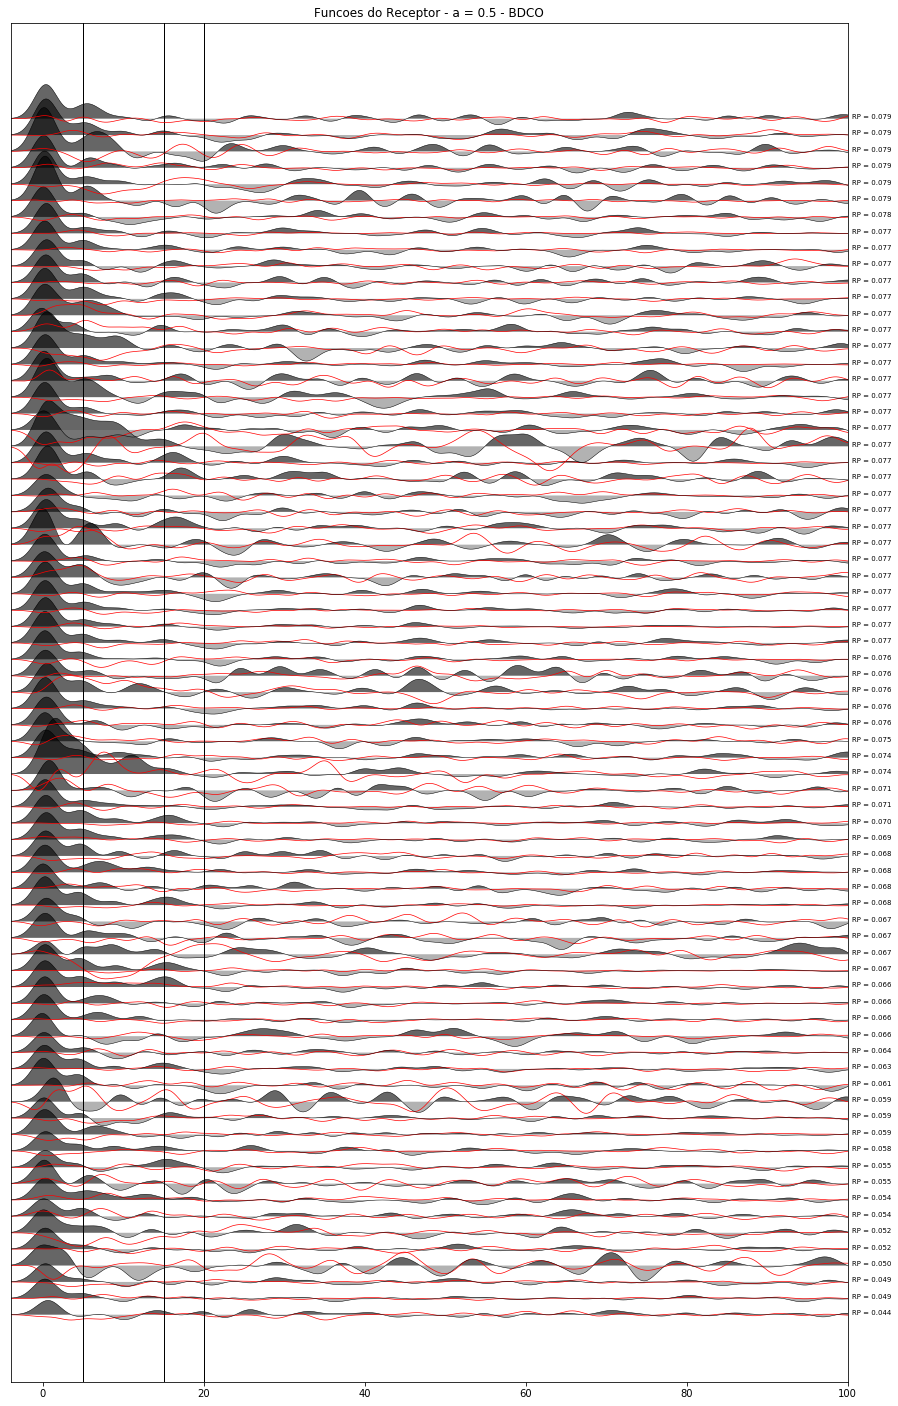

In [92]:
plt.figure(figsize = (15,25))
for j, i in enumerate(orglisl_05): 
    plt.plot(TF_05[i].times()-10,j/10+TF_05[i].data,'r',linewidth=0.7)
    plt.plot(RF_05[i].times()-10,j/10+RF_05[i].data,'k',linewidth=0.5)
    plt.fill_between(RF_05[i].times()-10,j/10+RF_05[i].data,j/10,where=(j/10+RF_05[i].data)>=j/10, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_05[i].times()-10,j/10+RF_05[i].data,j/10,where=(j/10+RF_05[i].data)<=j/10, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(100.5,j/10,'RP = '+"{0:.3f}".format(RFRP_05[i]),fontsize=7)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 0.5 - '+STA[z])
    plt.xlim(-4,100)

<h3 align="center">a = 1.0</h3>

In [93]:
RFgcarc = [i.stats.sac.gcarc for i in RF_10]
RFevdp = [i.stats.sac.evdp for i in RF_10]
RFbaz = [i.stats.sac.baz for i in RF_10]
RFRP = [i.stats.sac.user8 for i in RF_10]

orglisl = np.argsort(RFRP)

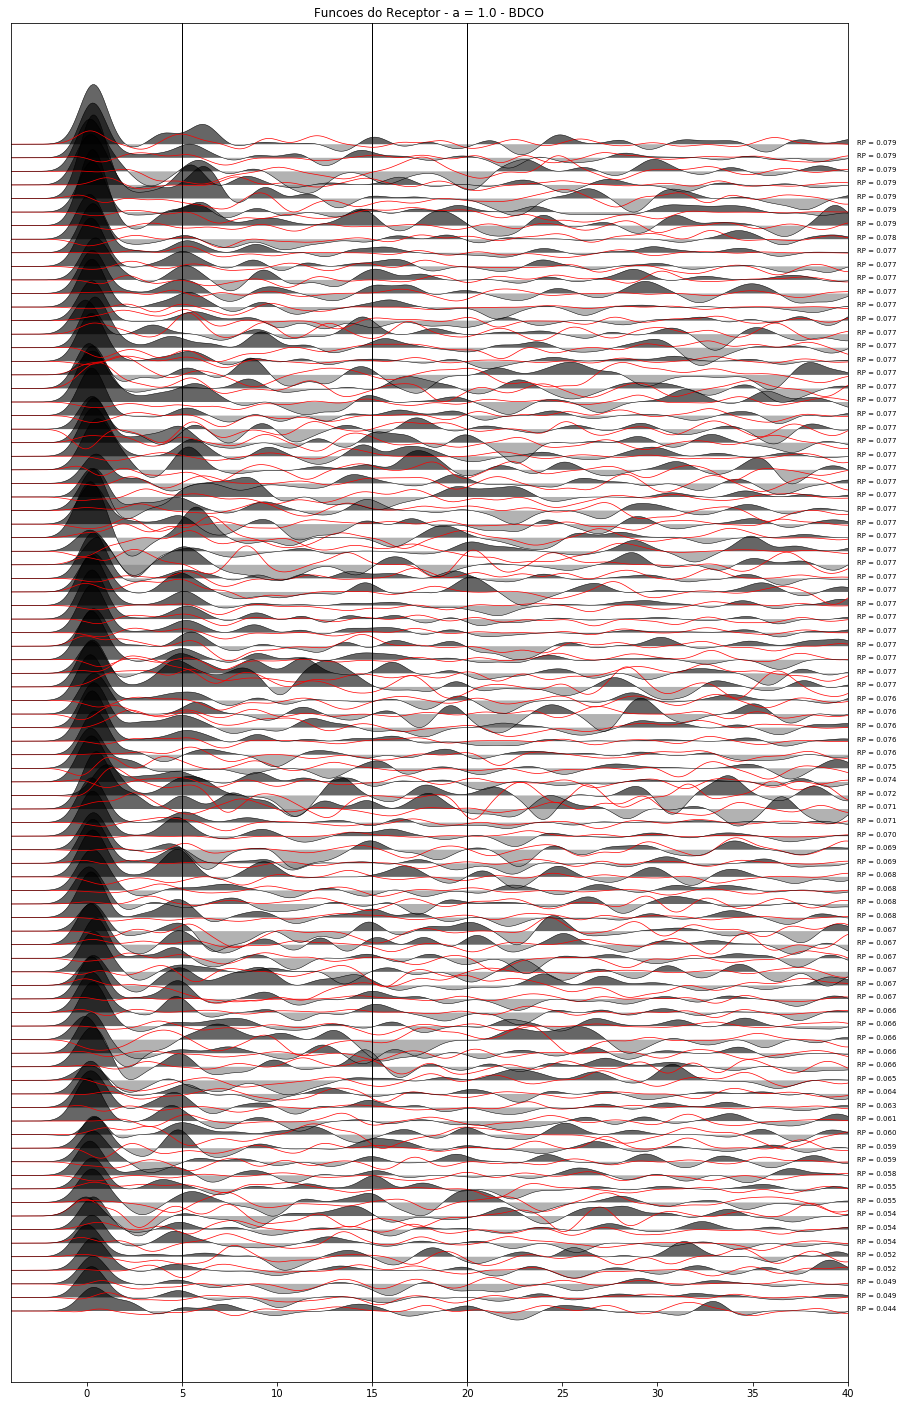

In [94]:
plt.figure(figsize = (15,25))
for j, i in enumerate(orglisl): 
    plt.plot(TF_10[i].times()-10,j/10+TF_10[i].data,'r',linewidth=0.7)
    plt.plot(RF_10[i].times()-10,j/10+RF_10[i].data,'k',linewidth=0.5)
    plt.fill_between(RF_10[i].times()-10,j/10+RF_10[i].data,j/10,where=(j/10+RF_10[i].data)>=j/10, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_10[i].times()-10,j/10+RF_10[i].data,j/10,where=(j/10+RF_10[i].data)<=j/10, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(40.5,j/10,'RP = '+"{0:.3f}".format(RFRP[i]),fontsize=7)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 1.0 - '+STA[z])
    plt.xlim(-4,40)



<h3 align="center">a = 2.5</h3>

In [95]:
RFgcarc_25 = [i.stats.sac.gcarc for i in RF_25]
RFevdp_25 = [i.stats.sac.evdp for i in RF_25]
RFbaz_25 = [i.stats.sac.baz for i in RF_25]
RFRP_25 = [i.stats.sac.user8 for i in RF_25]

#orglisl_25 = np.argsort(RFbaz_25)
orglisl_25 = np.argsort(RFRP_25)

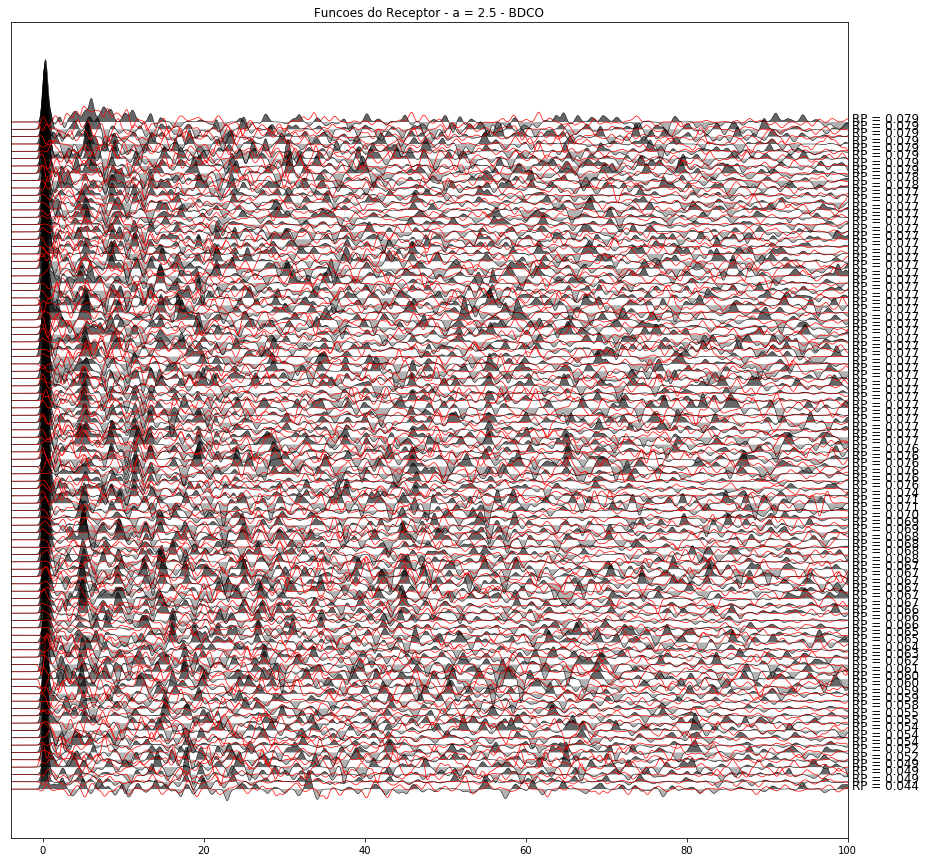

In [111]:
plt.figure(figsize = (15,15))
for j, i in enumerate(orglisl_25): 
    plt.plot(TF_25[i].times()-10,j/10+TF_25[i].data,'r',linewidth=0.7)
    plt.plot(RF_25[i].times()-10,j/10+RF_25[i].data,'k',linewidth=0.5)
    plt.fill_between(RF_25[i].times()-10,j/10+RF_25[i].data,j/10,where=(j/10+RF_25[i].data)>=j/10, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_25[i].times()-10,j/10+RF_25[i].data,j/10,where=(j/10+RF_25[i].data)<=j/10, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(100.5,j/10,'RP = '+"{0:.3f}".format(RFRP_25[i]),fontsize=12)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 2.5 - '+STA[z])
    plt.xlim(-4,100)

<h3 align="center">Empilhando as Funções do Receptor após a filtragem</h3>

<h3 align="center">a = 0.5 </h3>

In [97]:
RF_stack_05 = np.array(RF_05).sum(axis=0)/len(RF_05)

In [98]:
y = []
for i,j in enumerate(RF_05): 
    y.append(j.data)

In [99]:
min_y = [min(a) for a in zip(*y)]
max_y = [max(a) for a in zip(*y)]

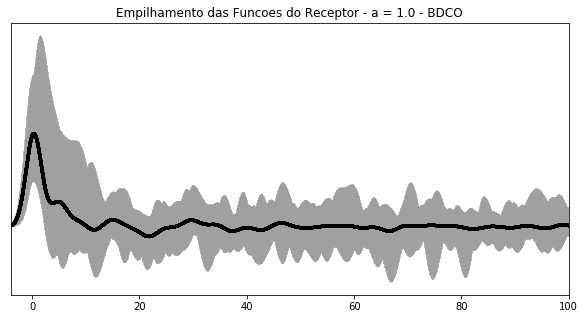

In [100]:
plt.figure(figsize = (10,5))
for j, i in enumerate(RF_05): 
    plt.plot(RF_05[1].times()-10,RF_stack_05,'k',linewidth=3)
    plt.fill_between(RF_05[0].times()-10,min_y,max_y, facecolor='grey',alpha=0.01, interpolate=True)
    plt.yticks([])
    plt.title('Empilhamento das Funcoes do Receptor - a = 1.0 - '+STA[z])
    plt.xlim(-4,100)

<h3 align="center">a = 1.0 </h3>

In [101]:
RF_stack = np.array(RF_10).sum(axis=0)/len(RF_10)

In [102]:
y = []
for i,j in enumerate(RF_10): 
    y.append(j.data)

In [103]:
min_y = [min(a) for a in zip(*y)]
max_y = [max(a) for a in zip(*y)]

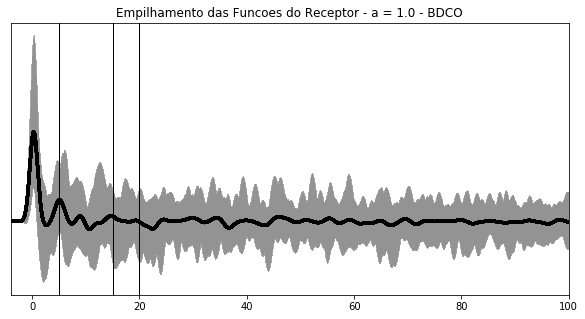

In [104]:
plt.figure(figsize = (10,5))
for j, i in enumerate(RF_10): 
    plt.plot(RF_10[1].times()-10,RF_stack,'k',linewidth=3)
    plt.fill_between(RF_10[0].times()-10,min_y,max_y, facecolor='grey',alpha=0.01, interpolate=True)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Empilhamento das Funcoes do Receptor - a = 1.0 - '+STA[z])
    plt.xlim(-4,100)

<h3 align="center">a = 2.5 </h3>

In [105]:
RF_stack_25 = np.array(RF_25).sum(axis=0)/len(RF_25)

In [106]:
y_25 = []
for i,j in enumerate(RF_25): 
    y_25.append(j.data)

In [107]:
min_y_25 = [min(a) for a in zip(*y_25)]
max_y_25 = [max(a) for a in zip(*y_25)]

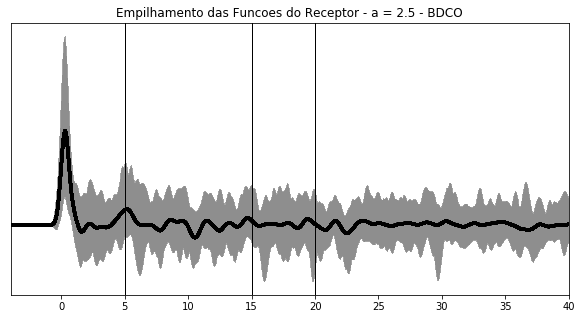

In [108]:
plt.figure(figsize = (10,5))
for j, i in enumerate(RF_25): 
    plt.plot(RF_25[1].times()-10,RF_stack_25,'k',linewidth=3)
    plt.fill_between(RF_25[0].times()-10,min_y_25,max_y_25,alpha=0.01, facecolor='grey',interpolate=True)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Empilhamento das Funcoes do Receptor - a = 2.5 - '+STA[z])
    plt.xlim(-4,40)

# Figura Artigo

# 1.0

In [109]:
# Collect all data
evlo_data = []
evla_data = []
magnitudes = [] 
for i, j in enumerate(RF_05):
    stlo_data = j.stats.sac.stlo
    stla_data = j.stats.sac.stla
    evlo_data.append(j.stats.sac.evlo)
    evla_data.append(j.stats.sac.evla)
    magnitudes.append(j.stats.sac.mag)
    
# Collect time of used data

'''tPs_30 = []
tPpPs_30 = [] 
tPsPs_tPpSs_30 = []
tPs_tPpPs_tPsPs_tPpSs_30 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/vp_65_tPs_tPpPs_tPsPs_tPpSs_out.txt')
for i,j in enumerate(tPs_tPpPs_tPsPs_tPpSs_30):
    tPs_30.append(j[1])
    tPpPs_30.append(j[2]) 
    tPsPs_tPpSs_30.append(j[3])   
tPs_30_stack = sum(tPs_30)/len(tPs_30)
tPpPs_30_stack = sum(tPpPs_30)/len(tPpPs_30)
tPsPs_tPpSs_30_stack = sum(tPsPs_tPpSs_30)/len(tPsPs_tPpSs_30)'''

RFRbom_30_plot = op.read('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/*.eqr')
RFTbom_30_plot = op.read('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/*.eqt')
RF_bom_baz_30_plot = [i.stats.sac.baz for i in RFRbom_30_plot]
orglisl_bom_30_plot = np.argsort(RF_bom_baz_30_plot)

RFR_stack_30_final_plot = op.read('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/*.eqr')

Exception: No file matching file pattern: /home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/joint_inversion/gcarc_30_1.0/BDCO/*.eqr

In [ ]:
fig = plt.figure(figsize=(20,20),facecolor='white')
# set up subplot grid
gs = gridspec.GridSpec(2,1, wspace=1,hspace=0,height_ratios=[3, 1])

factor = 20

ax1 = fig.add_subplot(gs[0])
for j, i in enumerate(orglisl): 
    #ax1.plot(TF[i].times()-10,j/factor+TF[i].data,'grey',linewidth=1.5)
    ax1.plot(RF_10[i].times()-10,j/factor+RF_10[i].data,'k',linewidth=2)
    plt.fill_between(RF_10[i].times()-10,j/factor+RF_10[i].data,j/factor,where=(j/factor+RF_10[i].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_10[i].times()-10,j/factor+RF_10[i].data,j/factor,where=(j/factor+RF_10[i].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(100.5,j/factor,"{0:.3f}".format(RFRP[i]),fontsize=8)
    #plt.plot(tPs_30[i],j/factor,"|k",markersize=5)
    #plt.plot(tPpPs_30[i],j/factor,"|k",markersize=5)
    #plt.plot(tPsPs_tPpSs_30[i],j/factor,"|k",markersize=5)
    ax1.set_yticks([])
    ax1.set_ylabel('Ray Parameter (s/km)',fontsize=12)
    ax1.set_xlim(-4,100)

# small subplot 1
a = plt.axes([0.75, 0.75, .2, .2])
m = Basemap(resolution='l',projection='ortho',lat_0=-5.,lon_0=-45.)
m.drawmapboundary()
m.drawcoastlines(linewidth=0.5)
#m.drawmeridians(np.arange(0, 360, 30))
#m.drawparallels(np.arange(-90, 90, 30))

stx,sty = m(stlo_data, stla_data)
m.plot(stx,sty , '^k', markersize=8)
#plt.text(stx-250000,sty+200000,STA[z],color='w')

m.tissot(stlo_data,stla_data,30,50,edgecolor='w',ls='dashed',linewidth=2,facecolor='none')
#m.tissot(stlo,stla,90,50,zorder=10,edgecolor='w',linewidth=2,facecolor='none')

for lon, lat, mag in zip(evlo_data, evla_data, magnitudes):
    x,y = m(lon, lat)
    msize = mag*1
    m.plot(x, y, '*',markersize=msize,markeredgecolor='grey',markerfacecolor='grey')
    
# small subplot 2
ax2 = fig.add_subplot(gs[1],sharex=ax1)
ax2.plot(RF_10[0].times()-10,RF_stack,'k',linewidth=3)
plt.fill_between(RF_10[0].times()-10,0,RF_stack,where=(RF_stack)>=0, facecolor='black',alpha=0.6, interpolate=True)
plt.fill_between(RF_10[0].times()-10,0,RF_stack,where=(RF_stack)<=0, facecolor='gray',alpha=0.6, interpolate=True)    
#plt.axvline(x=tPs_30_stack, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
#plt.axvline(x=tPpPs_30_stack, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
#plt.axvline(x=tPsPs_tPpSs_30_stack, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
ax2.set_yticks([])
ax2.set_xlim(-4,100)

    
# small subplot 3
#plt.subplot2grid((2,2), (1,1))
#im = plt.imread(get_sample_data('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/pgplot.png'))
#plt.axis("off")
#plt.imshow(im)


#plt.tight_layout()
fig.text(0.5, 0.9, STA[z], va='center', fontsize='xx-large')
fig.text(0.85, 0.29, 'a = 1.0', va='center', fontsize='xx-large')
#plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/'+STA[z]+'_mosaico.pdf')

/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


Text(0.7,0.9,'a = 1.0')

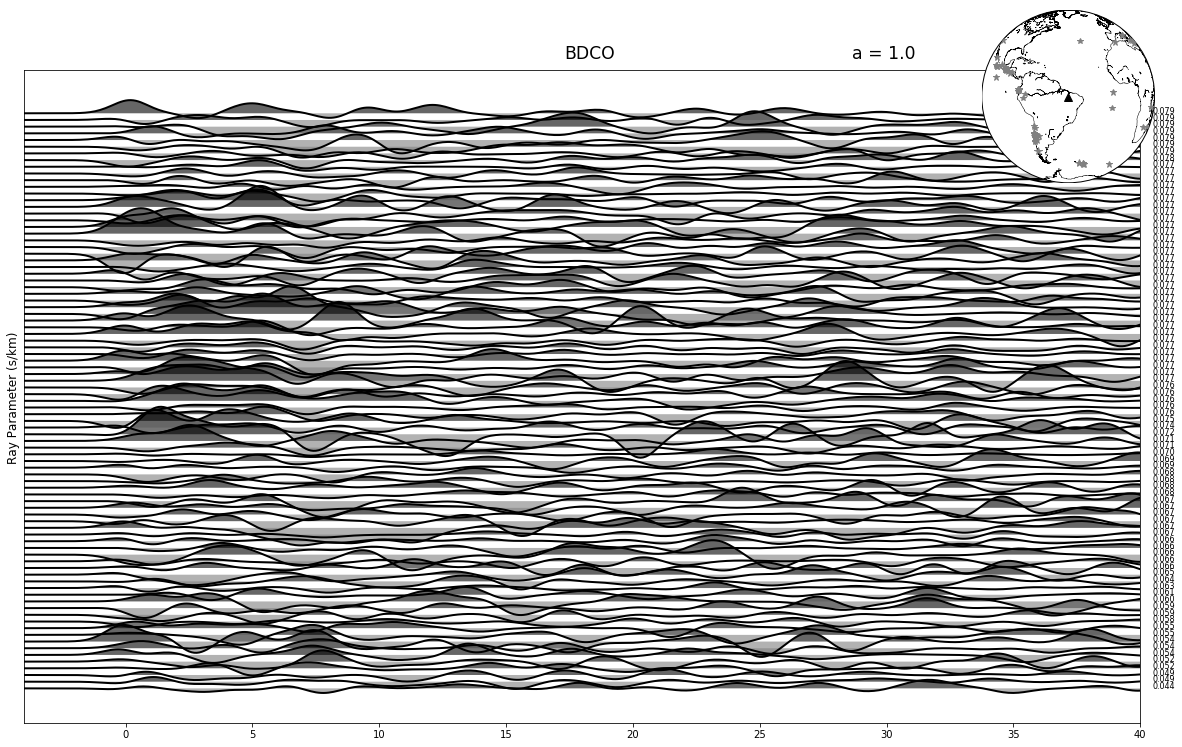

In [110]:
fig = plt.figure(figsize=(20,12),facecolor='white')
# set up subplot grid
gs = gridspec.GridSpec(1,1,wspace=1,hspace=0)

factor = 20

ax1 = fig.add_subplot(gs[0])
for j, i in enumerate(orglisl): 
    ax1.plot(TF_10[i].times()-10,j/factor+TF_10[i].data,'k',linewidth=2)
    plt.fill_between(TF_10[i].times()-10,j/factor+TF_10[i].data,j/factor,where=(j/factor+TF_10[i].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(TF_10[i].times()-10,j/factor+TF_10[i].data,j/factor,where=(j/factor+TF_10[i].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(40.5,j/factor,"{0:.3f}".format(RFRP[i]),fontsize=8)
    ax1.set_yticks([])
    ax1.set_ylabel('Ray Parameter (s/km)',fontsize=12)
    ax1.set_xlim(-4,40)

# small subplot 1
a = plt.axes([0.75, 0.75, .2, .2])
m = Basemap(resolution='l',projection='ortho',lat_0=-5.,lon_0=-45.)
m.drawmapboundary()
m.drawcoastlines(linewidth=0.5)
#m.drawmeridians(np.arange(0, 360, 30))
#m.drawparallels(np.arange(-90, 90, 30))

stx,sty = m(stlo_data, stla_data)
m.plot(stx,sty , '^k', markersize=8)
#plt.text(stx-250000,sty+200000,STA[z],color='w')

m.tissot(stlo_data,stla_data,30,50,edgecolor='w',ls='dashed',linewidth=2,facecolor='none')
#m.tissot(stlo,stla,90,50,zorder=10,edgecolor='w',linewidth=2,facecolor='none')

for lon, lat, mag in zip(evlo_data, evla_data, magnitudes):
    x,y = m(lon, lat)
    msize = mag*1
    m.plot(x, y, '*',markersize=msize,markeredgecolor='grey',markerfacecolor='grey')

#plt.tight_layout()
fig.text(0.5, 0.9, STA[z], va='center', fontsize='xx-large')
fig.text(0.7, 0.9, 'a = 1.0', va='center', fontsize='xx-large')
#plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/'+STA[z]+'_mosaico.pdf')

# 2.5

In [70]:
# Collect all data
evlo_data = []
evla_data = []
magnitudes = [] 
for i, j in enumerate(RF_25):
    stlo_data = j.stats.sac.stlo
    stla_data = j.stats.sac.stla
    evlo_data.append(j.stats.sac.evlo)
    evla_data.append(j.stats.sac.evla)
    magnitudes.append(j.stats.sac.mag)
'''# Collect time of used data
tPs_30_25 = []
tPpPs_30_25 = [] 
tPsPs_tPpSs_30_25 = []
tPs_tPpPs_tPsPs_tPpSs_30_25 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/vp_65_tPs_tPpPs_tPsPs_tPpSs_out.txt')
for i,j in enumerate(tPs_tPpPs_tPsPs_tPpSs_30_25):
    tPs_30_25.append(j[1])
    tPpPs_30_25.append(j[2]) 
    tPsPs_tPpSs_30_25.append(j[3])
    
tPs_30_25_stack = sum(tPs_30_25)/len(tPs_30_25)
tPpPs_30_25_stack = sum(tPpPs_30_25)/len(tPpPs_30_25)
tPsPs_tPpSs_30_25_stack = sum(tPsPs_tPpSs_30_25)/len(tPsPs_tPpSs_30_25)'''

"# Collect time of used data\ntPs_30_25 = []\ntPpPs_30_25 = [] \ntPsPs_tPpSs_30_25 = []\ntPs_tPpPs_tPsPs_tPpSs_30_25 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/vp_65_tPs_tPpPs_tPsPs_tPpSs_out.txt')\nfor i,j in enumerate(tPs_tPpPs_tPsPs_tPpSs_30_25):\n    tPs_30_25.append(j[1])\n    tPpPs_30_25.append(j[2]) \n    tPsPs_tPpSs_30_25.append(j[3])\n    \ntPs_30_25_stack = sum(tPs_30_25)/len(tPs_30_25)\ntPpPs_30_25_stack = sum(tPpPs_30_25)/len(tPpPs_30_25)\ntPsPs_tPpSs_30_25_stack = sum(tPsPs_tPpSs_30_25)/len(tPsPs_tPpSs_30_25)"

/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


Text(0.85,0.29,'a = 2.5')

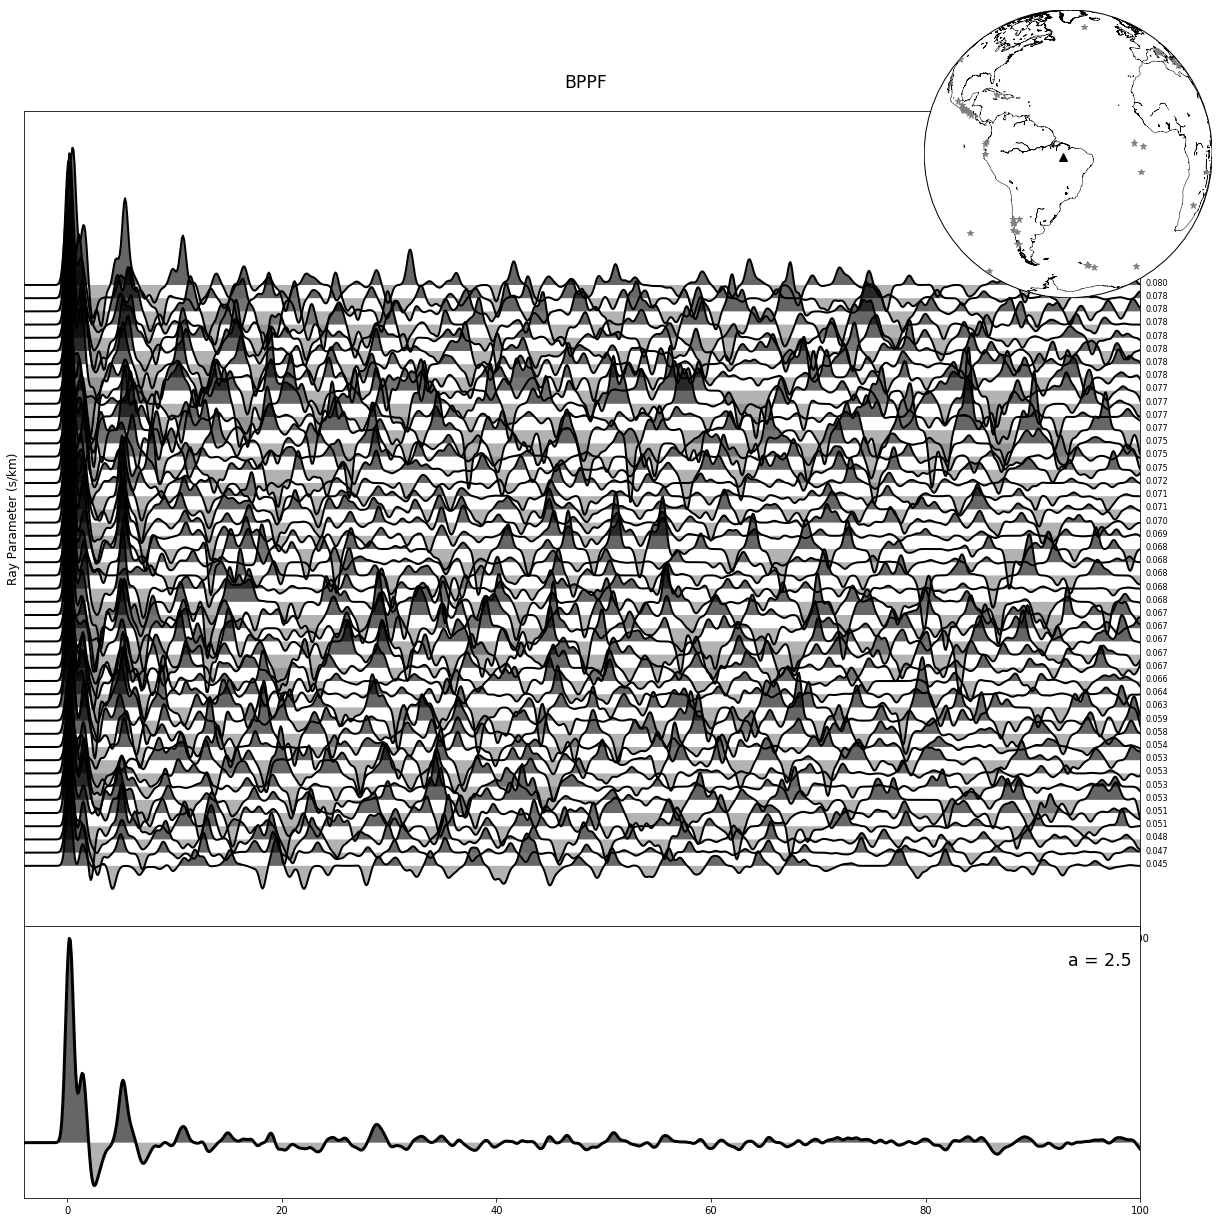

In [74]:
fig = plt.figure(figsize=(20,20),facecolor='white')
# set up subplot grid
gs = gridspec.GridSpec(2,1, wspace=1,hspace=0,height_ratios=[3, 1])

factor_25 = 15
ax1 = fig.add_subplot(gs[0])
for j, i in enumerate(orglisl_25): 
    #ax1.plot(TF_25[i].times()-10,j/factor_25+TF_25[i].data,'gray',linewidth=1.5)
    ax1.plot(RF_25[i].times()-10,j/factor_25+RF_25[i].data,'k',linewidth=2)
    plt.fill_between(RF_25[i].times()-10,j/factor_25+RF_25[i].data,j/factor_25,where=(j/factor_25+RF_25[i].data)>=j/factor_25, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_25[i].times()-10,j/factor_25+RF_25[i].data,j/factor_25,where=(j/factor_25+RF_25[i].data)<=j/factor_25, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(100.5,j/factor_25,"{0:.3f}".format(RFRP_25[i]),fontsize=8)
    #plt.plot(tPs_30_25[i],j/factor_25,"|k",markersize=5)
    #plt.plot(tPpPs_30_25[i],j/factor_25,"|k",markersize=5)
    #plt.plot(tPsPs_tPpSs_30_25[i],j/factor_25,"|k",markersize=5)
    ax1.set_yticks([])
    ax1.set_ylabel('Ray Parameter (s/km)',fontsize=12)
    ax1.set_xlim(-4,100)

# small subplot 1
a = plt.axes([0.75, 0.75, .2, .2])
m = Basemap(resolution='l',projection='ortho',lat_0=-5.,lon_0=-45.)
m.drawmapboundary()
m.drawcoastlines(linewidth=0.5)

stx,sty = m(stlo_data, stla_data)
m.plot(stx,sty , '^k', markersize=8)

m.tissot(stlo_data,stla_data,30,50,edgecolor='w',ls='dashed',linewidth=2,facecolor='none')
#m.tissot(stlo,stla,90,50,zorder=10,edgecolor='w',linewidth=2,facecolor='none')

for lon, lat, mag in zip(evlo_data, evla_data, magnitudes):
    x,y = m(lon, lat)
    msize = mag*1
    m.plot(x, y, '*',markersize=msize,markeredgecolor='grey',markerfacecolor='grey')
    
# small subplot 2
ax2 = fig.add_subplot(gs[1],sharex=ax1)
ax2.plot(RF_25[0].times()-10,RF_stack_25,'k',linewidth=3)
plt.fill_between(RF_25[0].times()-10,0,RF_stack_25,where=(RF_stack_25)>=0, facecolor='black',alpha=0.6, interpolate=True)
plt.fill_between(RF_25[0].times()-10,0,RF_stack_25,where=(RF_stack_25)<=0, facecolor='gray',alpha=0.6, interpolate=True)    
#plt.axvline(x=tPs_30_25_stack, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
#plt.axvline(x=tPpPs_30_25_stack, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
#plt.axvline(x=tPsPs_tPpSs_30_25_stack, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
ax2.set_yticks([])
ax2.set_xlim(-4,100)
    
# small subplot 3
#plt.subplot2grid((2,2), (1,1))
#im = plt.imread(get_sample_data('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/pgplot.png'))
#plt.axis("off")
#plt.imshow(im)


#plt.tight_layout()
fig.text(0.5, 0.9, STA[z], va='center', fontsize='xx-large')
fig.text(0.85, 0.29, 'a = 2.5', va='center', fontsize='xx-large')
#plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/'+STA[z]+'_mosaico.pdf')

/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


Text(0.7,0.9,'a = 2.5')

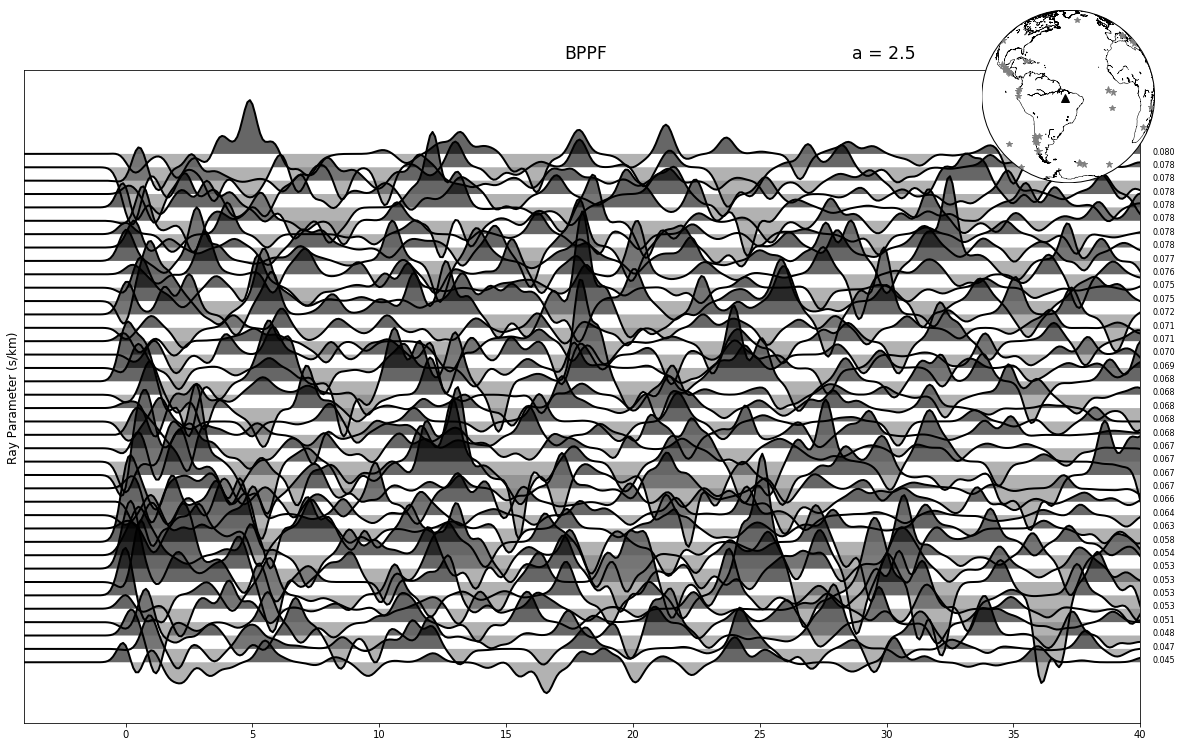

In [75]:
fig = plt.figure(figsize=(20,12),facecolor='white')
# set up subplot grid
gs = gridspec.GridSpec(1,1,wspace=1,hspace=0)

factor = 20

ax1 = fig.add_subplot(gs[0])
for j, i in enumerate(orglisl): 
    ax1.plot(TF_25[i].times()-10,j/factor+TF_25[i].data,'k',linewidth=2)
    plt.fill_between(TF_25[i].times()-10,j/factor+TF_25[i].data,j/factor,where=(j/factor+TF_25[i].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(TF_25[i].times()-10,j/factor+TF_25[i].data,j/factor,where=(j/factor+TF_25[i].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(40.5,j/factor,"{0:.3f}".format(RFRP[i]),fontsize=8)
    ax1.set_yticks([])
    ax1.set_ylabel('Ray Parameter (s/km)',fontsize=12)
    ax1.set_xlim(-4,40)

# small subplot 1
a = plt.axes([0.75, 0.75, .2, .2])
m = Basemap(resolution='l',projection='ortho',lat_0=-5.,lon_0=-45.)
m.drawmapboundary()
m.drawcoastlines(linewidth=0.5)
#m.drawmeridians(np.arange(0, 360, 30))
#m.drawparallels(np.arange(-90, 90, 30))

stx,sty = m(stlo_data, stla_data)
m.plot(stx,sty , '^k', markersize=8)
#plt.text(stx-250000,sty+200000,STA[z],color='w')

m.tissot(stlo_data,stla_data,30,50,edgecolor='w',ls='dashed',linewidth=2,facecolor='none')
#m.tissot(stlo,stla,90,50,zorder=10,edgecolor='w',linewidth=2,facecolor='none')

for lon, lat, mag in zip(evlo_data, evla_data, magnitudes):
    x,y = m(lon, lat)
    msize = mag*1
    m.plot(x, y, '*',markersize=msize,markeredgecolor='grey',markerfacecolor='grey')

#plt.tight_layout()
fig.text(0.5, 0.9, STA[z], va='center', fontsize='xx-large')
fig.text(0.7, 0.9, 'a = 2.5', va='center', fontsize='xx-large')
#plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/'+STA[z]+'_mosaico.pdf')

# 0.5

In [76]:
# Collect all data
evlo_data = []
evla_data = []
magnitudes = [] 
for i, j in enumerate(RF_05):
    stlo_data = j.stats.sac.stlo
    stla_data = j.stats.sac.stla
    evlo_data.append(j.stats.sac.evlo)
    evla_data.append(j.stats.sac.evla)
    magnitudes.append(j.stats.sac.mag)
'''# Collect time of used data
tPs_30_25 = []
tPpPs_30_25 = [] 
tPsPs_tPpSs_30_25 = []
tPs_tPpPs_tPsPs_tPpSs_30_25 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/vp_65_tPs_tPpPs_tPsPs_tPpSs_out.txt')
for i,j in enumerate(tPs_tPpPs_tPsPs_tPpSs_30_25):
    tPs_30_25.append(j[1])
    tPpPs_30_25.append(j[2]) 
    tPsPs_tPpSs_30_25.append(j[3])
    
tPs_30_25_stack = sum(tPs_30_25)/len(tPs_30_25)
tPpPs_30_25_stack = sum(tPpPs_30_25)/len(tPpPs_30_25)
tPsPs_tPpSs_30_25_stack = sum(tPsPs_tPpSs_30_25)/len(tPsPs_tPpSs_30_25)'''

"# Collect time of used data\ntPs_30_25 = []\ntPpPs_30_25 = [] \ntPsPs_tPpSs_30_25 = []\ntPs_tPpPs_tPsPs_tPpSs_30_25 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/vp_65_tPs_tPpPs_tPsPs_tPpSs_out.txt')\nfor i,j in enumerate(tPs_tPpPs_tPsPs_tPpSs_30_25):\n    tPs_30_25.append(j[1])\n    tPpPs_30_25.append(j[2]) \n    tPsPs_tPpSs_30_25.append(j[3])\n    \ntPs_30_25_stack = sum(tPs_30_25)/len(tPs_30_25)\ntPpPs_30_25_stack = sum(tPpPs_30_25)/len(tPpPs_30_25)\ntPsPs_tPpSs_30_25_stack = sum(tPsPs_tPpSs_30_25)/len(tPsPs_tPpSs_30_25)"

/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


Text(0.85,0.29,'a = 2.5')

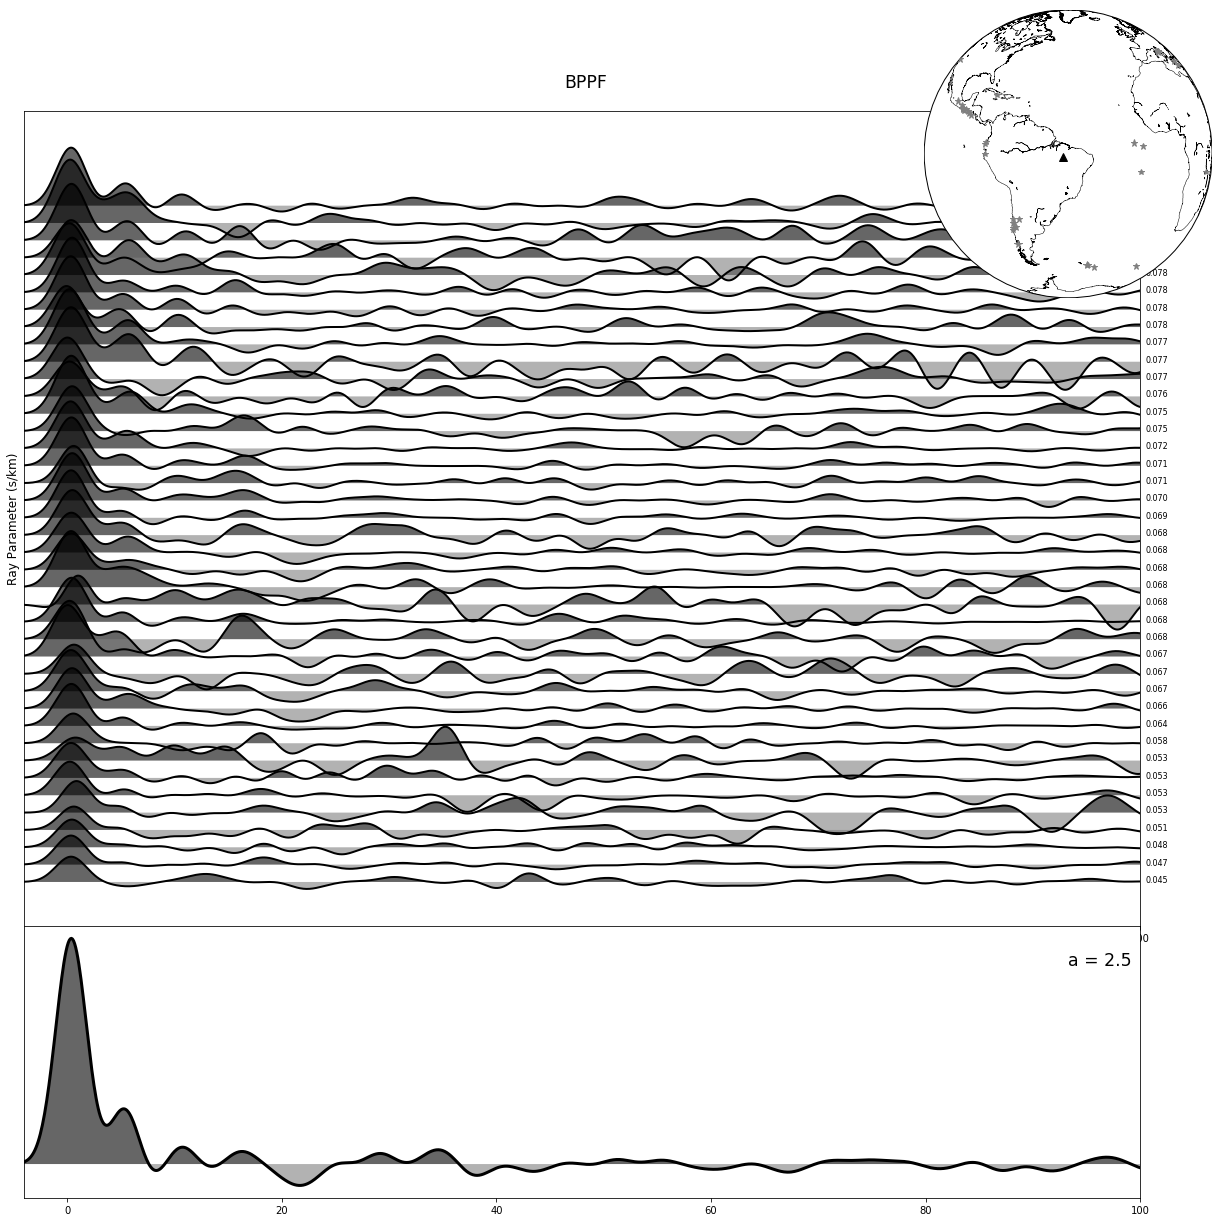

In [77]:
fig = plt.figure(figsize=(20,20),facecolor='white')
# set up subplot grid
gs = gridspec.GridSpec(2,1, wspace=1,hspace=0,height_ratios=[3, 1])

factor_05 = 15
ax1 = fig.add_subplot(gs[0])
for j, i in enumerate(orglisl_05): 
    #ax1.plot(TF_05[i].times()-10,j/factor_05+TF_05[i].data,'gray',linewidth=1.5)
    ax1.plot(RF_05[i].times()-10,j/factor_05+RF_05[i].data,'k',linewidth=2)
    plt.fill_between(RF_05[i].times()-10,j/factor_05+RF_05[i].data,j/factor_05,where=(j/factor_05+RF_05[i].data)>=j/factor_05, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_05[i].times()-10,j/factor_05+RF_05[i].data,j/factor_05,where=(j/factor_05+RF_05[i].data)<=j/factor_05, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(100.5,j/factor_05,"{0:.3f}".format(RFRP_05[i]),fontsize=8)
    #plt.plot(tPs_30_25[i],j/factor_25,"|k",markersize=5)
    #plt.plot(tPpPs_30_25[i],j/factor_25,"|k",markersize=5)
    #plt.plot(tPsPs_tPpSs_30_25[i],j/factor_25,"|k",markersize=5)
    ax1.set_yticks([])
    ax1.set_ylabel('Ray Parameter (s/km)',fontsize=12)
    ax1.set_xlim(-4,100)

# small subplot 1
a = plt.axes([0.75, 0.75, .2, .2])
m = Basemap(resolution='l',projection='ortho',lat_0=-5.,lon_0=-45.)
m.drawmapboundary()
m.drawcoastlines(linewidth=0.5)

stx,sty = m(stlo_data, stla_data)
m.plot(stx,sty , '^k', markersize=8)

m.tissot(stlo_data,stla_data,30,50,edgecolor='w',ls='dashed',linewidth=2,facecolor='none')
#m.tissot(stlo,stla,90,50,zorder=10,edgecolor='w',linewidth=2,facecolor='none')

for lon, lat, mag in zip(evlo_data, evla_data, magnitudes):
    x,y = m(lon, lat)
    msize = mag*1
    m.plot(x, y, '*',markersize=msize,markeredgecolor='grey',markerfacecolor='grey')
    
# small subplot 2
ax2 = fig.add_subplot(gs[1],sharex=ax1)
ax2.plot(RF_05[0].times()-10,RF_stack_05,'k',linewidth=3)
plt.fill_between(RF_05[0].times()-10,0,RF_stack_05,where=(RF_stack_05)>=0, facecolor='black',alpha=0.6, interpolate=True)
plt.fill_between(RF_05[0].times()-10,0,RF_stack_05,where=(RF_stack_05)<=0, facecolor='gray',alpha=0.6, interpolate=True)    
#plt.axvline(x=tPs_30_25_stack, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
#plt.axvline(x=tPpPs_30_25_stack, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
#plt.axvline(x=tPsPs_tPpSs_30_25_stack, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
ax2.set_yticks([])
ax2.set_xlim(-4,100)
    
# small subplot 3
#plt.subplot2grid((2,2), (1,1))
#im = plt.imread(get_sample_data('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/pgplot.png'))
#plt.axis("off")
#plt.imshow(im)


#plt.tight_layout()
fig.text(0.5, 0.9, STA[z], va='center', fontsize='xx-large')
fig.text(0.85, 0.29, 'a = 2.5', va='center', fontsize='xx-large')
#plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/'+STA[z]+'_mosaico.pdf')

/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


Text(0.7,0.9,'a = 0.5')

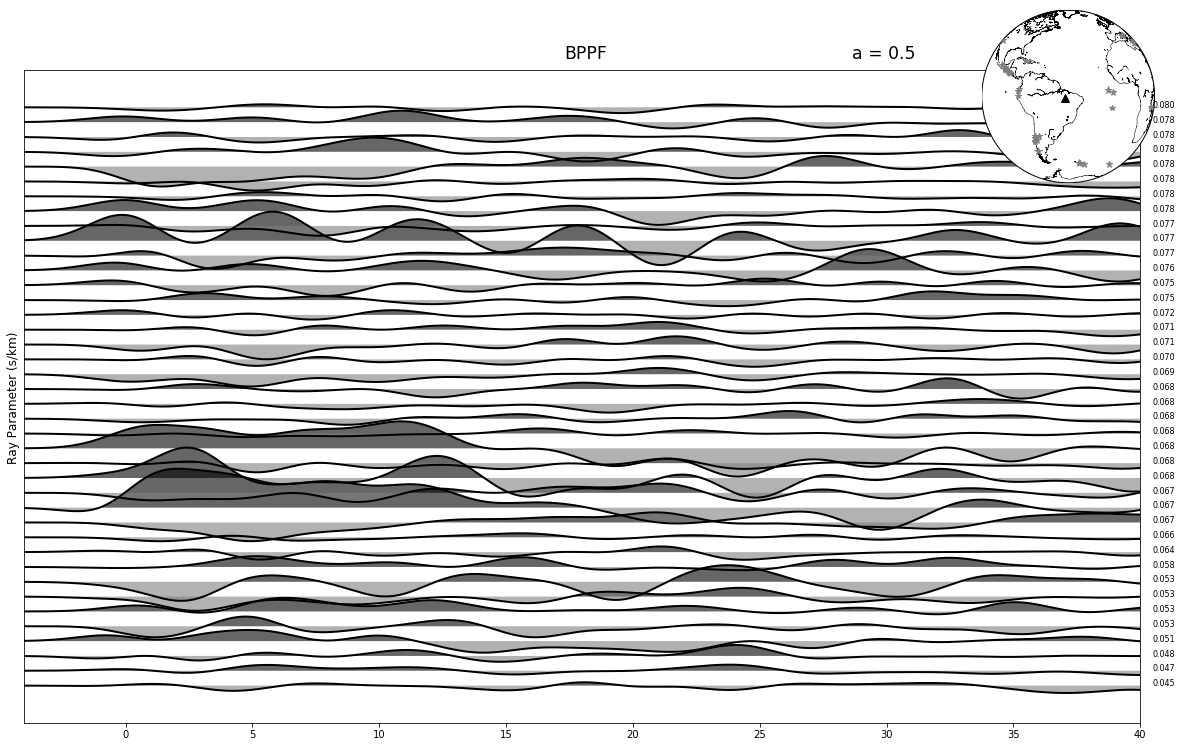

In [78]:
fig = plt.figure(figsize=(20,12),facecolor='white')
# set up subplot grid
gs = gridspec.GridSpec(1,1,wspace=1,hspace=0)

factor_05 = 20

ax1 = fig.add_subplot(gs[0])
for j, i in enumerate(orglisl_05): 
    ax1.plot(TF_05[i].times()-10,j/factor+TF_05[i].data,'k',linewidth=2)
    plt.fill_between(TF_05[i].times()-10,j/factor+TF_05[i].data,j/factor,where=(j/factor+TF_05[i].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(TF_05[i].times()-10,j/factor+TF_05[i].data,j/factor,where=(j/factor+TF_05[i].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(40.5,j/factor_05,"{0:.3f}".format(RFRP_05[i]),fontsize=8)
    ax1.set_yticks([])
    ax1.set_ylabel('Ray Parameter (s/km)',fontsize=12)
    ax1.set_xlim(-4,40)

# small subplot 1
a = plt.axes([0.75, 0.75, .2, .2])
m = Basemap(resolution='l',projection='ortho',lat_0=-5.,lon_0=-45.)
m.drawmapboundary()
m.drawcoastlines(linewidth=0.5)
#m.drawmeridians(np.arange(0, 360, 30))
#m.drawparallels(np.arange(-90, 90, 30))

stx,sty = m(stlo_data, stla_data)
m.plot(stx,sty , '^k', markersize=8)
#plt.text(stx-250000,sty+200000,STA[z],color='w')

m.tissot(stlo_data,stla_data,30,50,edgecolor='w',ls='dashed',linewidth=2,facecolor='none')
#m.tissot(stlo,stla,90,50,zorder=10,edgecolor='w',linewidth=2,facecolor='none')

for lon, lat, mag in zip(evlo_data, evla_data, magnitudes):
    x,y = m(lon, lat)
    msize = mag*1
    m.plot(x, y, '*',markersize=msize,markeredgecolor='grey',markerfacecolor='grey')

#plt.tight_layout()
fig.text(0.5, 0.9, STA[z], va='center', fontsize='xx-large')
fig.text(0.7, 0.9, 'a = 0.5', va='center', fontsize='xx-large')
#plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/'+STA[z]+'_mosaico.pdf')